### Read to Data

In [1]:
# import neccessary libraries
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('./household_power_consumption.txt', sep=';')
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Since this is a time series task, i will combine the Date and Time column as one for easy manipulation of data and a better time series analysis

In [2]:
df = pd.read_csv('./household_power_consumption.txt', sep=';', 
                 parse_dates={'date' : ['Date', 'Time']},
                 infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

In [3]:
df.head()

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


##### Augument data
Considering this to be a time series task i will extract datetime features from the date column to help us understand different variations across different dates

In [4]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd. DatetimeIndex(df['date']).day

In [5]:
df.head()

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month,year,day
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,12,2006,16
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,12,2006,16
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,12,2006,16
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,12,2006,16
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,12,2006,16


### Data Preprocessing

In [6]:
# check for missing values
df.isna().sum()

date                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
month                        0
year                         0
day                          0
dtype: int64

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
# verify for missing values
df.isna().sum()

date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
month                    0
year                     0
day                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   month                  int64         
 9   year                   int64         
 10  day                    int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 174.2 MB


### Data Visualization

In [10]:
# import libraries for our time series task
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

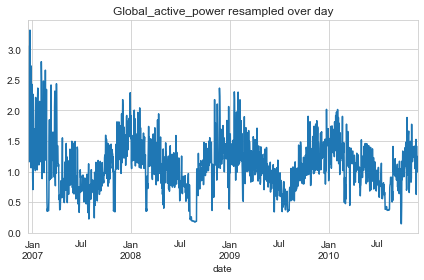

In [11]:
df.set_index('date').Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day')
plt.tight_layout()
plt.show()

The plot above shows the global active power was at peak as at [jan2017] with a rise and fall pattern indicating seasonality.To harness the trend knowledge well ill resample and aggregate with the mean and std for traces of outliers outside the pattern

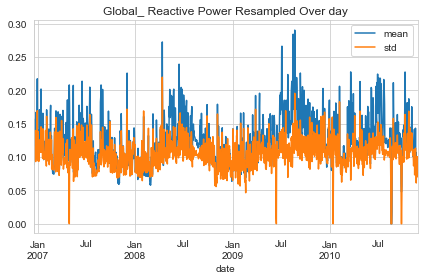

In [12]:
df.set_index('date').Global_reactive_power.resample('D').agg(['mean','std']).plot(title='Global_ Reactive Power Resampled Over day')
plt.tight_layout()
plt.show()

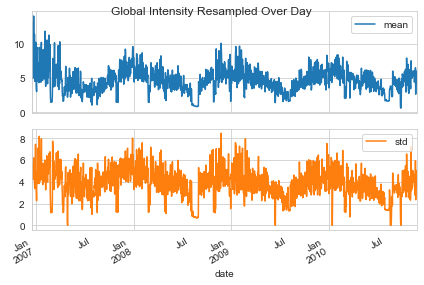

In [13]:
df.set_index('date').Global_intensity.resample('D').agg(['mean','std']).plot(subplots=True, title='Global Intensity Resampled Over Day')
plt.tight_layout()
plt.show()

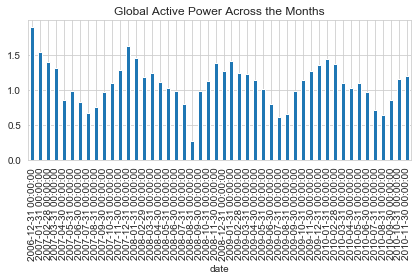

In [14]:
df.set_index('date').Global_active_power.resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Global Active Power Across the Months')
plt.tight_layout()
plt.show()

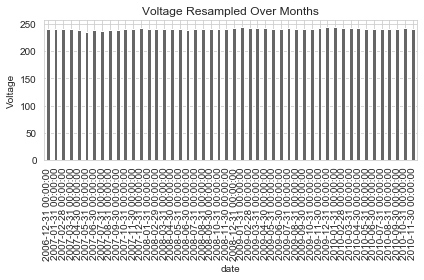

In [15]:
df.set_index('date').Voltage.resample('M').mean().plot(kind='bar',color='0.4')
plt.xticks(rotation=90)
plt.title('Voltage Resampled Over Months')
plt.ylabel('Voltage')
plt.tight_layout()
plt.show()

The above plot indicates there are no obvious difference in the Voltages across the Months. Which is okay to conclude that the voltages are constant.

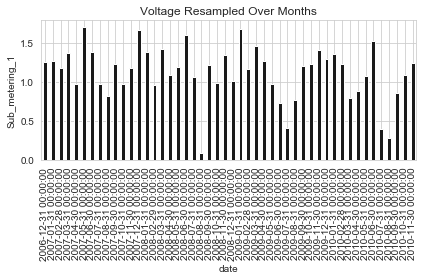

In [16]:
df.set_index('date').Sub_metering_1.resample('M').mean().plot(kind='bar',color='0.1')
plt.xticks(rotation=90)
plt.title('Voltage Resampled Over Months')
plt.ylabel('Sub_metering_1')
plt.tight_layout()
plt.show()

Now we can resample the entire features over day and compare their mean

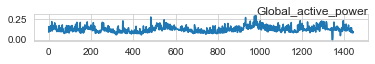

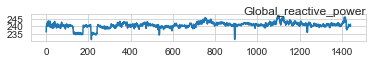

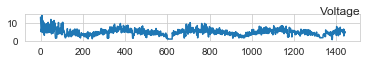

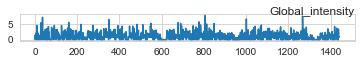

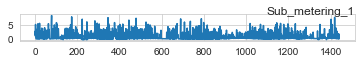

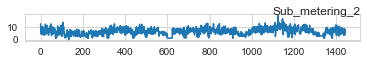

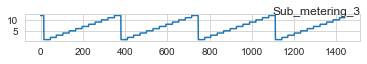

In [17]:
plot_cols=[1, 2, 3, 4, 5, 6,7]
i=1

#plt.figure(figsize=(15, 10))
groups= plot_cols
values = df.set_index('date').resample('D').mean().values
# map each column to plot
for group in groups:
    plt.subplot(len(plot_cols),1 , i+1)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y= 0.75, loc='right')
    #i += 1
    plt.show()

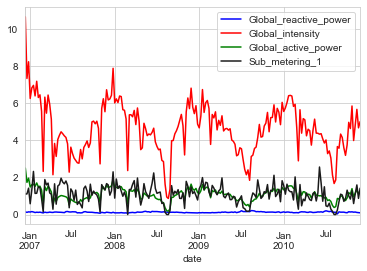

In [18]:
## We resample the features over the week and compare their mean
df.set_index('date').Global_reactive_power.resample('W').mean().plot(color='b',legend=True)
df.set_index('date').Global_intensity.resample('W').mean().plot(color='r',legend=True)
df.set_index('date').Global_active_power.resample('W').mean().plot(color='g',legend=True)
df.set_index('date').Sub_metering_1.resample('W').mean().plot(color='0.1',legend=True)
plt.show()

##### Checking for data feature distribution

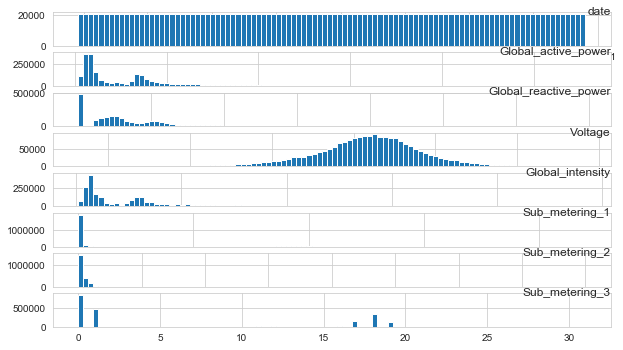

In [19]:
plt.figure(figsize=(10, 8))
for i in range(len(df.columns[0:8])):
               plt.subplot(len(df.columns), 1 ,i+1)
               name = df.columns[i]
               df[name].hist(bins=100)
               plt.title(name, y=0.75,loc='right')
        

##### observation:
- The above distributions are all skewed except for the voltage that is perfectly gaussian
- The global acive power and global intensity are positively skewed showing a bimodal distribution indicating two group mean of observation.

###### According to instructions, we were asked to develop a univariant time series with the [Global_active_power]. But before then i will like to zoom in to see the actual pattern of the variable with our augmented features like the months of the year and days of the month

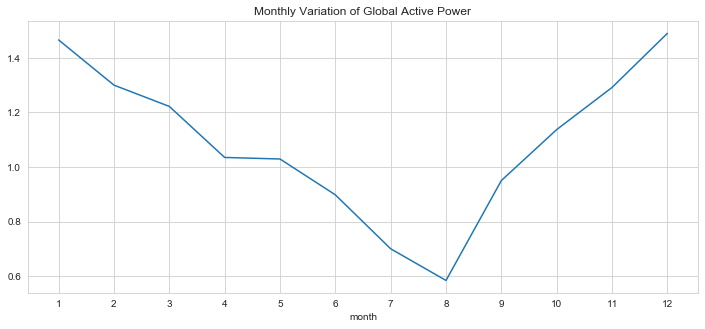

In [20]:
Dategroup = df.groupby('month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0, 13))
Dategroup['Global_active_power'].plot(x=df.month)
plt.title('Monthly Variation of Global Active Power')
plt.show()

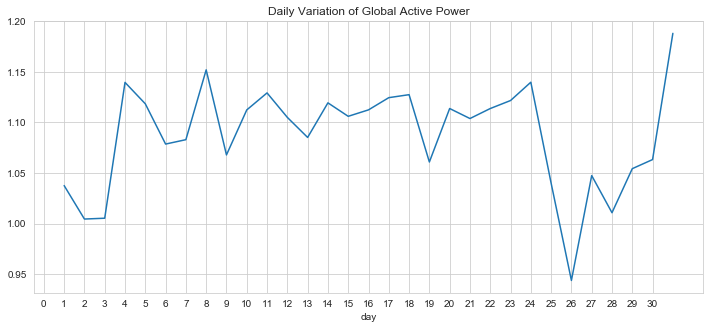

In [21]:
Dategroup = df.groupby('day').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0, 31))
Dategroup['Global_active_power'].plot(x=df.day)
plt.title('Daily Variation of Global Active Power')
plt.show()

The above zoomed plot for the Global active power is now clearer in understanding the actual pattern across daily and monthly periods

##                        Time Series with Prophet

In [27]:
# import neccessary libraries for time series task
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning,)
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.metrics import r2_score
from sklearn import utils
from fbprophet import Prophet

In [23]:
# feature selection
df_series = df.loc[:, ['date', 'Global_active_power']]

In [24]:
df_series.head()

,date,Global_active_power
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666


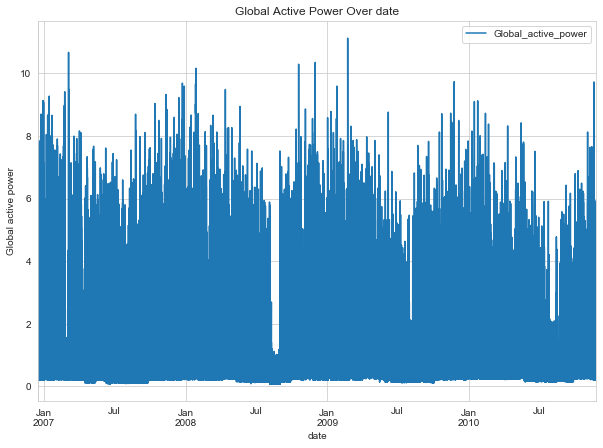

In [25]:
ax = df_series.set_index('date').plot(figsize=(10,7))
ax.set_ylabel('Global active power')
ax.set_xlabel('date')

plt.title('Global Active Power Over date')
plt.show()

#####  The above graph shows global active power is seasonal in nature

In [26]:
df_series.dtypes

date                   datetime64[ns]
Global_active_power           float64
dtype: object

Prophet imposes a strict condition to feed it with acceptable parameters,therefore we transform our feature names by renaming them

In [28]:
df_series = df_series.rename(columns={'date':'ds','Global_active_power':'y'})

In [29]:
df_series.head()

,ds,y
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666


###### following instructions, we were asked to downsample the data to daily sample and make prediction of 365


In [30]:
resample_df = df_series.set_index('ds').resample('D').mean()

In [31]:
resample_df.shape

(1442, 1)

In [32]:
resample_df.head()

,y
ds,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658


If one looks closely one will notice the ds(date) was set as index to enable us resample our data, but wont be accepted by our model whose parsed columns are not meant to be indexed. So we reset index and parse it to our model

In [35]:
final_resample = resample_df.reset_index()

In [36]:
final_resample.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [39]:
# instantiate our model
model = Prophet(interval_width = 0.95, weekly_seasonality=True,
               seasonality_mode='multiplicative',daily_seasonality=False)

In [43]:
## Splitting our data into train and test set
train = final_resample[(final_resample['ds'] > '2006-12-16') & (final_resample['ds'] <= '2010-11-26')]
test = final_resample[(final_resample['ds'] > '2010-11-26')]

In [44]:
train.shape

(1441, 2)

In [46]:
# fit model on our train data
model.fit(train)

###### Make future Dataframe

In [47]:
# Our model is instructed to make a 12month prediction 
future_dates = model.make_future_dataframe(periods = 365,freq='D')
future_dates.tail()

,ds
1801,2011-11-22
1802,2011-11-23
1803,2011-11-24
1804,2011-11-25
1805,2011-11-26


In [48]:
# predicting future dates
forecast = model.predict(future_dates)
forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
1801,2011-11-22,1.368118,0.808188,1.957108,1.055954,1.024845,1.094978
1802,2011-11-23,1.390179,0.794864,1.931934,1.055935,1.024651,1.095079
1803,2011-11-24,1.293325,0.723268,1.890363,1.055916,1.024457,1.095180
1804,2011-11-25,1.353036,0.794360,1.930385,1.055898,1.024263,1.095282
1805,2011-11-26,1.535607,0.959221,2.106224,1.055879,1.024069,1.095383


##### Make Forecast

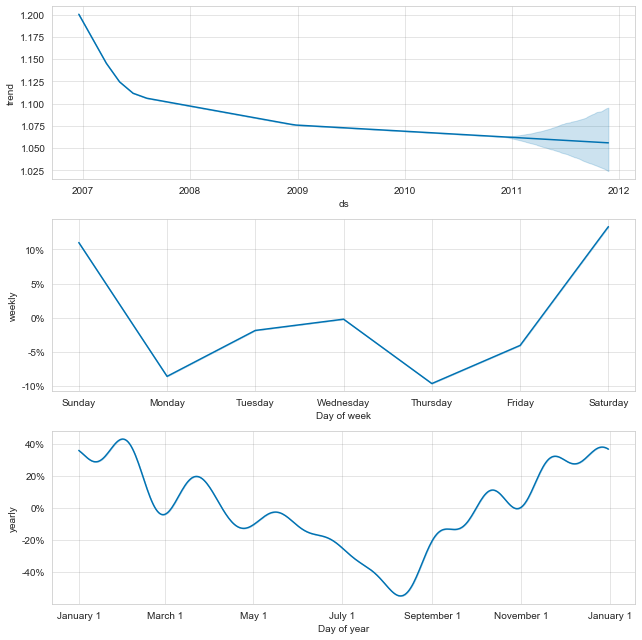

In [49]:
fig = model.plot_components(forecast)

###### The component forecast gives an overview of the trend, dicomposed into yearly and and weekly trend. Now we will ggregate all these obervations into one single forecast

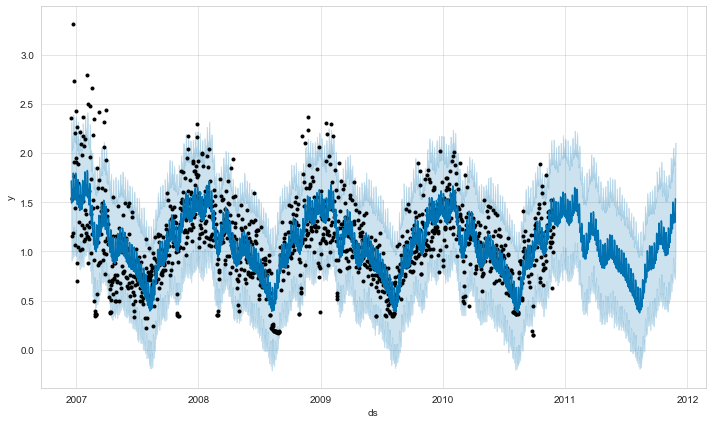

In [50]:
fig = model.plot(forecast)

##### Forecast result evaluation

We will be evaluating the following metrics for measuring the accuracy of our forecast

- R2_Scored
- Mean Absolute Error(MAE)
- Mean Squared Error(RMSE)

In [51]:
metric_df = forecast.set_index('ds')[['yhat']].join(train.set_index('ds').y).reset_index()

In [52]:
metric_df

,ds,yhat,y
0,2006-12-17,1.717796,2.354486
1,2006-12-18,1.492436,1.530435
2,2006-12-19,1.582733,1.157079
3,2006-12-20,1.611690,1.545658
4,2006-12-21,1.507350,1.192439
...,...,...,...
1801,2011-11-22,1.368118,NaN
1802,2011-11-23,1.390179,NaN
1803,2011-11-24,1.293325,NaN
1804,2011-11-25,1.353036,NaN


We have nan values towards the last part of the dataframe for y, we will drop these values since our only concern is to check the forecast values versus the actual value

In [53]:
metric_df.dropna(inplace=True)

### Mean Absolute Error

In [54]:
MAE(metric_df.y, metric_df.yhat)

0.21979660475471674

#### R2 Score

In [55]:
r2_score(metric_df.y, metric_df.yhat)

0.5063394236672989

#### RMSE Score

In [56]:
RMSE(metric_df.y, metric_df.yhat)

0.08678499655912739

### Summary Forecast

In [57]:
forecastnew = forecast['ds']
forecastnew1 =forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew1],axis = 1)
mask = (forecastnew['ds'] > '2010-11-26') & (forecast['ds'] <= '2012-03-01')

forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > '2006-12-16') & (forecastnew['ds'] <= '2010-11-26')
forecastnew = forecastnew.loc[mask]

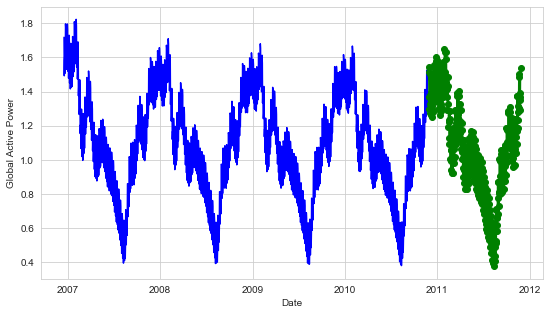

In [58]:
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.plot(forecastnew.set_index('ds'),color='b')
ax1.plot(forecastedvalues.set_index('ds'), color = 'g', marker='o')
ax1.set_ylabel('Global Active Power')
ax1.set_xlabel('Date')

plt.show()

## quiz questions

In [121]:
import seaborn as sns
df = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power',data=df)

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

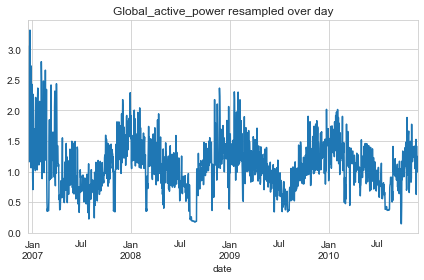

In [122]:
df.set_index('date').Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day')
plt.tight_layout()
plt.show()

In [ ]:
sns.jointplot(x=)